# Music recommender system

A **recommender system** is a type of information filtering system that suggests items to users based on their preferences and behavior. It uses data analysis techniques to understand a user's behavior and to predict what they might like or be interested in.

There are two main types of recommender systems:

**Content-based recommender systems**: This type of system analyzes the characteristics of the items a user has interacted with, such as the content of a movie or the genre of a book, to recommend similar items.

**Collaborative filtering recommender systems**: This type of system analyzes the behavior of multiple users to recommend items that are popular among users with similar interests.

Recommender systems are used in a variety of applications, such as e-commerce websites, social media platforms, and music and video streaming services, to personalize the user experience and improve engagement. They can also help businesses increase revenue by suggesting additional products or services that a user might be interested in.

# 1) Content-based recommender systems

Recommendations done using content-based recommenders can be seen as a user-specific classification problem. This classifier learns the user's likes and dislikes from the features of the song.

The most straightforward approach is **keyword matching**.

In our case, because we are working with text and words, **Term Frequency-Inverse Document Frequency (TF-IDF)** can be used for this matching process.

**(TF-IDF)** can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

#### Importing libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#from typing import List, Dict

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#### Loading dataset

We collected the dataset from following github repository:
https://github.com/ugis22/music_recommender/blob/master/content%20based%20recommedation%20system/songdata.csv

In [4]:
data =  pd.read_csv('songdata.csv')

In [5]:
data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [6]:
data.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/e/eurythmics/royal+infirmary_20584934.html,Chestnuts roasting on an open fire \nJack Fro...
freq,191,35,1,6


In [7]:
data.shape

(57650, 4)

This dataset contains name, artist, and lyrics for 57650 songs in English.

Because of the dataset being so big, we are going to resample only 5000 random songs.

In [8]:
data = data.sample(n=5000).drop('link', axis=1).reset_index(drop=True)

#### Data pre-processing

In [9]:
data.isnull().sum()

artist    0
song      0
text      0
dtype: int64

No null values found.

In [10]:
data.dtypes

artist    object
song      object
text      object
dtype: object

Data types are appropriate.

In [11]:
data.duplicated().sum()

0

No duplicates.

We can notice also the presence of `\n` in the text, so we are going to remove it.

In [12]:
data['text'] = data['text'].str.replace(r'\n', '')

#### Data Preparation

We use TF-IDF vectorizer that calculates the TF-IDF score for each song lyric, word-by-word.

In [13]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [14]:
lyrics_matrix = tfidf.fit_transform(data['text'])

*How do we use this matrix for a recommendation?*

We now need to calculate the similarity of one lyric to another. We are going to use **cosine similarity**.

We want to calculate the cosine similarity of each item with every other item in the dataset. So we just pass the lyrics_matrix as argument.

In [15]:
cosine_similarities = cosine_similarity(lyrics_matrix) 

Once we get the similarities, we'll store in a dictionary the names of the 50 most similar songs for each song in our dataset.

In [16]:
similarities = {}

In [17]:

for i in range(len(cosine_similarities)):
    # Now we'll sort each element in cosine_similarities and get the indexes of the songs. 
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] 
    # After that, we'll store in similarities each name of the 50 most similar songs.
    # Except the first one that is the same song.
    similarities[data['song'].iloc[i]] = [(cosine_similarities[i][x], data['song'][x], data['artist'][x]) for x in similar_indices][1:]

We can use that similarity scores to access the most similar items and give a recommendation.

For that, we'll define our Content based recommender class.

In [18]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score") 
            print("--------------------")
        
    def recommend(self, recommendation):
        # Get song to find recommendations for
        song = recommendation['song']
        # Get number of songs to recommend
        number_songs = recommendation['number_songs']
        # Get the number of songs most similars from matrix similarities
        recom_song = self.matrix_similar[song][:number_songs]
        # print each item
        self._print_message(song=song, recom_song=recom_song)

Now, instantiate class.

In [21]:
recommedations = ContentBasedRecommender(similarities)

Then, we are ready to pick a song from the dataset and make a recommendation.

In [22]:
recommendation = {
    "song": data['song'].iloc[10],
    "number_songs": 4 
}

In [23]:
recommedations.recommend(recommendation)

The 4 recommended songs for More Than Oxygen are:
Number 1:
This Is My Song by Scorpions with 0.244 similarity score
--------------------
Number 2:
Need Your Love by Cheap Trick with 0.23 similarity score
--------------------
Number 3:
What A Song by Tom T. Hall with 0.21 similarity score
--------------------
Number 4:
Say The Word - I'll Be There by Kylie Minogue with 0.204 similarity score
--------------------


Let's try a second one.

In [24]:
recommendation2 = {
    "song": data['song'].iloc[120],
    "number_songs": 4 
}

In [25]:
recommedations.recommend(recommendation2)

The 4 recommended songs for Atin Cu Pung Singsing are:
Number 1:
Cinderella by Lionel Richie with 0.092 similarity score
--------------------
Number 2:
Gonna Love Ya by Reba Mcentire with 0.074 similarity score
--------------------
Number 3:
Arthur by Kinks with 0.068 similarity score
--------------------
Number 4:
I'm Ready For You by Drake with 0.061 similarity score
--------------------


#### Disadvantages of content-based recommender system

These algorithms try to recommend items similar to those that a user liked in the past. It does not rely on a user sign-in mechanism to generate this often temporary profile. As a result, the surprisal element is missing in the recommendation as same kind of content gets recommended.

# 2) Collaborative filtering

The aim of this algorithm is to learn a function that can predict if a user will benefit from an item - meaning the user will likely buy, listen to, watch this item.

Among collaborative-based systems, we can encounter two types: **user-item** filtering and **item-item** filtering.

There are several machine learning algorithms that can be used in the case of collaborative filtering. Among them, we can mention nearest-neighbor, clustering, and matrix factorization.

**K-Nearest Neighbors (kNN)** is considered the standard method when it comes to both user-based and item-based collaborative filtering approaches.

#### Importing libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.sparse import csr_matrix

#### Loading datasets

The datasets are collected from **WSDM - KKBox's Music Recommendation Challenge** on Kaggle (link below).
link : https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/overview

There are 4 different datasets that we are going to use, merging them and extracting the desired features.

In [27]:
songs_df = pd.read_csv('songs.csv')
songs_extra_df = pd.read_csv('song_extra_info.csv')
members_df = pd.read_csv('members.csv')
train_df = pd.read_csv('train.csv', nrows = 100000)

#### Merging datasets

In [32]:
t_s = pd.merge(train_df, songs_df, on='song_id', how='left')
t_s_se = pd.merge(t_s, songs_extra_df, on='song_id', how='left')
songs = pd.merge(t_s_se, members_df, on='msno', how='left')
del songs_df, songs_extra_df, members_df, train_df, t_s, t_s_se

Unwanted DataFrames are deleted while our final dataset is stored in the `songs` dataframe.

In [33]:
songs.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [34]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
msno                      100000 non-null object
song_id                   100000 non-null object
source_system_tab         99697 non-null object
source_screen_name        95727 non-null object
source_type               99805 non-null object
target                    100000 non-null int64
song_length               99996 non-null float64
genre_ids                 98498 non-null object
artist_name               99996 non-null object
composer                  78528 non-null object
lyricist                  59309 non-null object
language                  99996 non-null float64
name                      99991 non-null object
isrc                      91475 non-null object
city                      100000 non-null int64
bd                        100000 non-null int64
gender                    61328 non-null object
registered_via            100000 non-null int64
registration_init_time

#### Listing down the desired features from the dataset

`msno`, `song_id`, `target`, `artist_name`, `composer`, `lyricist`, `name`

and drop the rest.

In [35]:
songs.drop(songs.columns[[2, 3, 4, 6, 7, 11, 13, 14, 15, 16, 17, 18, 19]], axis=1, inplace=True)

Then, we'll check how many observions there are in the dataset.

In [36]:
print(f"There are {songs.shape[0]} observations in the dataset")

There are 100000 observations in the dataset


#### Data cleaning

Now, we should perform some cleaning steps.

In [37]:
songs.isnull().sum()

msno               0
song_id            0
target             0
artist_name        4
composer       21472
lyricist       40691
name               9
dtype: int64

There are around 21% and 40% of the null values in `composer` and `lyricist`, respectively. So we'll drop them as well.

In [38]:
songs.drop(songs.columns[[4, 5]], axis=1, inplace=True)

The 4 null values in `artist_name` and 9 in `name` can be treated by just dropping those rows from the dataset.

In [39]:
songs = songs.dropna(how='any',axis=0)

In [40]:
songs.isnull().sum()

msno           0
song_id        0
target         0
artist_name    0
name           0
dtype: int64

Check duplicated entries, if any.

In [41]:
songs.duplicated().sum()

0

In [42]:
songs.dtypes

msno           object
song_id        object
target          int64
artist_name    object
name           object
dtype: object

#### Data Description

Let's start exploring some characteristics of the dataset:

#### Unique songs

In [43]:
unique_songs = songs['name'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 23887 unique songs in the dataset


#### Unique artists

In [44]:
unique_artists = songs['artist_name'].unique().shape[0]
print(f"There are {unique_artists} unique artists in the dataset")

There are 5710 unique artists in the dataset


#### Unique users

In [45]:
unique_users = songs['msno'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

There are 6197 unique users in the dataset


We'll go ahead and explore the popularity of songs and artists.

#### Most popular songs

For this task, we'll count how many times each song appears. Note that while we are using `target`, we only care about the number of rows, we don't consider the number of listen by single user.

In [46]:
# count how many rows we have by song, we show only the ten more popular songs 
ten_pop_songs = songs.groupby('name')['target'].count().reset_index().sort_values(['target', 'name'], ascending = [0,1])

In [47]:
ten_pop_songs = ten_pop_songs[:10]
ten_pop_songs

,name,target
14883,告白氣球,487
22312,謝謝妳愛我 (Thanks For Your Love),415
16514,帥到分手,402
13820,你，好不好？ (How Have You Been?),387
2137,Closer,357
13230,不該,352
23673,默,349
15820,好愛好散 (Blue Love Theme),298
3261,Faded,282
16300,小幸運 (A little happiness),279


In [48]:
labels = ten_pop_songs['name'].tolist()
counts = ten_pop_songs['target'].tolist()

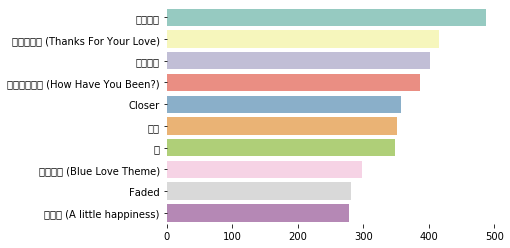

In [49]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

#### Most popular artist

For the next task, we'll count how many times each artist appears. Again, we'll count how many times the same artist appears.

In [50]:
# count how many rows we have by artist name, we show only the ten more popular artist 
ten_pop_artists  = songs.groupby(['artist_name'])['target'].count().reset_index().sort_values(['target', 'artist_name'], ascending = [0,1])

In [51]:
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists

,artist_name,target
3756,Various Artists,3727
4270,周杰倫 (Jay Chou),3404
4082,五月天 (Mayday),2343
4757,林俊傑 (JJ Lin),1778
5297,謝和弦 (R-chord),1363
5008,玖壹壹,1159
5477,陳奕迅 (Eason Chan),1036
3957,aMEI (張惠妹),975
5023,田馥甄 (Hebe),969
1141,Eric 周興哲,920


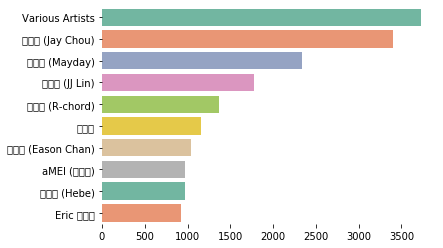

In [53]:
plt.figure()
labels = ten_pop_artists['artist_name'].tolist()
counts = ten_pop_artists['target'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

#### How many songs does a user listen in average?

In [54]:
song_user = songs.groupby('msno')['song_id'].count()

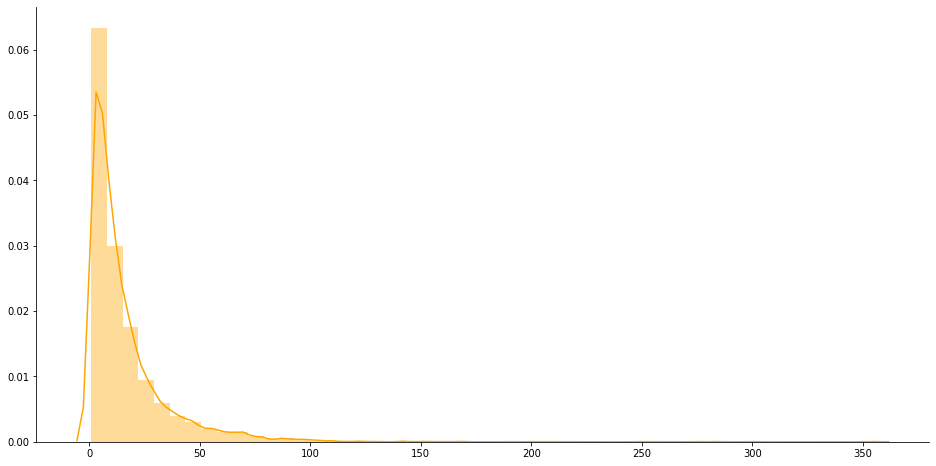

In [55]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [56]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 16.134742617395514 songs


In [57]:
print(f"A user listens to an average of {np.mean(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 16.134742617395514 songs, with minimum 1 and maximum 355 songs


We can see that a user listens in average to 16 songs. Even the maximum amount of songs listen by an user is 355, and we have 23887 songs in our dataset.

So, not all user listen to all songs, so a lot of values in the `song x users` matrix are going to be zero. Thus, we’ll be dealing with extremely sparse data.

How sparse? Let's check that:

In [58]:
# Get how many values should it be if all songs have been listen by all users
values_matrix = unique_users * unique_songs

In [60]:
# Substract the total values with the actural shape of the DataFrame songs
zero_values_matrix = values_matrix - songs.shape[0]

In [61]:
print(f"The matrix of users x songs has {zero_values_matrix} values that are zero")

The matrix of users x songs has 147927752 values that are zero


Dealing with such a sparse matrix, we'll take a lot of memory and resources. To make our life easier, let's just select all those users that have listened to at least 16 songs.

#### Prepare data

In [62]:
# Get users which have listen to at least 16 songs
song_ten_id = song_user[song_user > 16].index.to_list()

In [63]:
# Filtered the dataset to keep only those users with more than 16 listened
song_id_more_ten = songs[songs['msno'].isin(song_ten_id)].reset_index(drop=True)

In [64]:
# convert the dataframe into a pivot table
songs_features = song_id_more_ten.pivot(index='song_id', columns='msno', values='target').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(songs_features.values)

Let's take a look at the table `user x song`.

In [74]:
songs_features.head(20)

msno,+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=,+0B4aHABar5ltaWDG4M6KCzNxpD6wnsvZpvh+o9KgtE=,+2XBp2p9atTpyVPWac3SEEW41i8Xrnl7Utl/h8T4iOo=,+47I9cb7nrGOTd//sIc9prH7SEXA3ujNaL+1R5e1Hyo=,+7y3Yut0jtR9XNHSXNOgNy64F9bBF8pzBhN1fGIw23M=,+B+oiYLl5kv1IDNQv6PBkoh/Ar60ZjRfXQmUK7zvJO4=,+Ez0nI/qWfSARukmK2mqdW6rffcVoJf5y74BEo+7NQ0=,+LA1Ana39J4LFb+bRQJrdYsbTaeNGgFccPq0NsgTmhU=,+Op7cb8kCgBF5fMnisaSAIV71KhjMaFlwdQd0BM4OkY=,+R2/oqXFpOJfagOJDuDPjcdRy1VyDXVj88zUhhvONYQ=,...,zkx4wHRFZjeFuTgkglS1hSx8O6gPCwaoWppiimL2dHQ=,zlHBUBsWDaokMojjGy6ePkhan130FyKnXNIbuqriyFo=,zmyXj2YOKWLAeBxZApPKKGhVbvlTC5iNw0NuOftM2AY=,zn03Mbi/8Y7w6/gsnrUaym6NIMduThwnumGZ7Wl/uT4=,zn90b58dMYs6ZYFD81vffgSWFb/BfOY57eGZhjKad6o=,zpmMI7VnBhY9Y7NLV3YuqEzi5hkTGU784A29NOwIwE4=,zswCxzaeUrXgJnI3PqSp3i2u4BFbxevcbPzQPorYEW8=,zvwn/kCosrjvzwm0EjP0fkgeQh+SXLlOqypTUwTlLic=,zx51OvMA6lJ+iNxD6lZnUppO8ZKHhuKBIAgGXAObgqQ=,zyCQN/h38OmzYOsR6ecE+b7GFkO2eCHoxT1tXoFdUjA=
song_id,,,,,,,,,,,,,,,,,,,,,
++7GdTgp8zbQLYOki7hVPEOHpu+KLZClsGrGiEuL2uI=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++NP2gO99EW6w6sm4E1XP20nx8FhbBxsK9fOvbPHwd0=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++QfzyM/LiFaCuvkDFK/wJe13ZEMgTgAaVCcolo7nnY=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++chbCzz+7BYhLH5svRrj4AM37B1bTcC5O77wxODrVo=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++e0ms2cYxLeFjxP/I5Gjl1M68g6/xMCK6/HY8WxBwg=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++ezxSWRgPo7VimLbuChif2kuAZI5G6bmKuDdautYtw=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++k2aqGPJ7/9yGGPnlhalRdVulwbgHrLHNt1OD3rr9w=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
++zVwIlQiLwQOLumYfwBvz0z8XQ+/Gu7Wkry54DDrxk=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
+/6cHy+URZb0OhcMuP3r/KsmsSsiHKKTL0NA+K8IFtQ=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Because the system will output the id of the song, instead of the title, we'll make a function that maps those indices with the song title.

In [66]:
unique_songs = songs.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'name']]

In [67]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(unique_songs.set_index('song_id').loc[songs_features.index].name))
}

#### Model and recommendation

We know that we want to use the model to predict songs. For that, we'll use the `Recommender` class wrote in the `knn_recommender` file.

In [68]:
from recommeders.knn_recommender import Recommender

In [69]:
model = Recommender(metric='cosine', algorithm='brute', k=20, data=mat_songs_features, decode_id_song=decode_id_song)

In [71]:
song = 'Closer'

In [72]:
new_recommendations = model.make_recommendation(new_song=song, n_recommendations=10)

Starting the recommendation process for Closer ...
... Done


In [73]:
print(f"The recommendations for {song} are:")
print(f"{new_recommendations}")

The recommendations for Closer are:
['Uber', 'Se Muere un Hombre', 'Hurt', 'Long Hot Summer', "We Don't Talk Anymore", '#9 Dream', 'Both Sides Now', 'Cool', 'Stay The Night', '非常完美']


### References

* https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/overview

* https://en.wikipedia.org/wiki/Recommender_system

* https://www.kaggle.com/code/infinator/music-recommendation-system

* https://github.com/ugis22/music_recommender